In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mental-health-social-media/Mental-Health-Twitter.csv


# Classfying whether a tweet is positive or negative

**Import Libraries**

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Create a DataFrame for the dataset**

In [4]:
df = pd.read_csv('../input/mental-health-social-media/Mental-Health-Twitter.csv')
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


**Data Processing**

In [5]:
# check for missing values
df.isnull().sum()

Unnamed: 0      0
post_id         0
post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
dtype: int64

In [6]:
# create new dataframe with only the columns we need
df = df[['post_created', 'post_text', 'followers','friends', 'favourites', 'statuses', 'retweets']]
df.head()

,post_created,post_text,followers,friends,favourites,statuses,retweets
0,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,84,211,251,837,0
1,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1
2,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,84,211,251,837,0
3,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,2
4,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,84,211,251,837,1


In [7]:
# change the format of the post_created column to datetime (so we can better work with it)
df['post_created'] = pd.to_datetime(df['post_created'])
df.head()

,post_created,post_text,followers,friends,favourites,statuses,retweets
0,2015-08-30 07:48:37+00:00,It's just over 2 years since I was diagnosed w...,84,211,251,837,0
1,2015-08-30 07:31:33+00:00,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1
2,2015-08-29 22:11:07+00:00,Awake but tired. I need to sleep but my brain ...,84,211,251,837,0
3,2015-08-29 18:40:49+00:00,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,2
4,2015-08-29 18:40:26+00:00,It’s hard to say whether packing lists are mak...,84,211,251,837,1


In [8]:
!pip install textblob
!pip install nltk 

from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [10]:
# Change all characters in tweets to lower case
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [11]:
# Remove numbers from tweets
df["post_text"] = df["post_text"].str.replace("\d","")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [12]:
# Remove punctuation from tweets
df["post_text"] = df["post_text"].str.replace("[^\w\s]","")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


**Remove stop words from text to better analyze tweets**

In [13]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
sw = stopwords.words("english")
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Group similiar words together using Lemmatization**

In [14]:
from textblob import Word
nltk.download("wordnet")
nltk.download("omw-1.4")
df["post_text"] = df["post_text"].apply(lambda x: " ".join([Word(x).lemmatize()]))

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


**Tokenize each word**

In [15]:
from nltk.tokenize import word_tokenize
df["tokens"] = df["post_text"].apply(lambda x: TextBlob(x).words)

# Sentiment Analysis

In [16]:
!pip install textblob 
from textblob import TextBlob

In [17]:
# Create a list using blob that returns polarity
# which we will use to classify if a tweet is positive or negative
blob_emptylist = []

for i in df["post_text"]:
    blob = TextBlob(i).sentiment
    blob_emptylist.append(blob)

In [18]:
# Create a new dataframe to show polarity and subjectivity for each tweet
df2 = pd.DataFrame(blob_emptylist)
df2.head()


,polarity,subjectivity
0,0.100000,1.000000
1,-0.093750,0.750000
2,-0.400000,0.700000
3,0.900000,0.875000
4,-0.045833,0.370833


In [19]:
# Combine the two dataframes to show tweet and polarity
df3 = pd.concat([df.reset_index(drop=True), df2], axis=1)
df3.head()

,post_created,post_text,followers,friends,favourites,statuses,retweets,tokens,polarity,subjectivity
0,2015-08-30 07:48:37+00:00,years since diagnosed anxiety depression today...,84,211,251,837,0,"[years, since, diagnosed, anxiety, depression,...",0.100000,1.000000
1,2015-08-30 07:31:33+00:00,sunday need break im planning spend little tim...,84,211,251,837,1,"[sunday, need, break, im, planning, spend, lit...",-0.093750,0.750000
2,2015-08-29 22:11:07+00:00,awake tired need sleep brain ideas,84,211,251,837,0,"[awake, tired, need, sleep, brain, ideas]",-0.400000,0.700000
3,2015-08-29 18:40:49+00:00,rt sewhq retro bears make perfect gifts great ...,84,211,251,837,2,"[rt, sewhq, retro, bears, make, perfect, gifts...",0.900000,0.875000
4,2015-08-29 18:40:26+00:00,hard say whether packing lists making life eas...,84,211,251,837,1,"[hard, say, whether, packing, lists, making, l...",-0.045833,0.370833


In [20]:
# Since we only care about Positive or Negative we can drop subjectivity
# and only look at polarity

df4 = df3[['polarity','followers', 'friends', 'favourites', 'statuses', 'retweets','post_text','tokens']]
df4.head(20)

,polarity,followers,friends,favourites,statuses,retweets,post_text,tokens
0,0.100000,84,211,251,837,0,years since diagnosed anxiety depression today...,"[years, since, diagnosed, anxiety, depression,..."
1,-0.093750,84,211,251,837,1,sunday need break im planning spend little tim...,"[sunday, need, break, im, planning, spend, lit..."
2,-0.400000,84,211,251,837,0,awake tired need sleep brain ideas,"[awake, tired, need, sleep, brain, ideas]"
3,0.900000,84,211,251,837,2,rt sewhq retro bears make perfect gifts great ...,"[rt, sewhq, retro, bears, make, perfect, gifts..."
4,-0.045833,84,211,251,837,1,hard say whether packing lists making life eas...,"[hard, say, whether, packing, lists, making, l..."
5,0.136364,84,211,251,837,1,making packing lists new hobby movinghouse,"[making, packing, lists, new, hobby, movinghouse]"
6,-0.153571,84,211,251,837,1,point keeping stuff nostalgic reasons cross li...,"[point, keeping, stuff, nostalgic, reasons, cr..."
7,0.000000,84,211,251,837,0,currently findingboxesofrandomshit packing pha...,"[currently, findingboxesofrandomshit, packing,..."
8,-0.250000,84,211,251,837,0,cant bothered cook take away way lazy,"[cant, bothered, cook, take, away, way, lazy]"
9,0.000000,84,211,251,837,41,rt itventsnews itv releases promo video final ...,"[rt, itventsnews, itv, releases, promo, video,..."


In [21]:
# Positive = 1, Negative = 0
# Where positive = Sentiment Value > 0
# Negative = Sentiment Value < 0

df4["Sentiment"] =  np.where(df4["polarity"] >= 0 , "1", "0")

# Change data type of Sentiment to int
df4["Sentiment"] = df4["Sentiment"].astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
df4.head(10)

,polarity,followers,friends,favourites,statuses,retweets,post_text,tokens,Sentiment
0,0.100000,84,211,251,837,0,years since diagnosed anxiety depression today...,"[years, since, diagnosed, anxiety, depression,...",1
1,-0.093750,84,211,251,837,1,sunday need break im planning spend little tim...,"[sunday, need, break, im, planning, spend, lit...",0
2,-0.400000,84,211,251,837,0,awake tired need sleep brain ideas,"[awake, tired, need, sleep, brain, ideas]",0
3,0.900000,84,211,251,837,2,rt sewhq retro bears make perfect gifts great ...,"[rt, sewhq, retro, bears, make, perfect, gifts...",1
4,-0.045833,84,211,251,837,1,hard say whether packing lists making life eas...,"[hard, say, whether, packing, lists, making, l...",0
5,0.136364,84,211,251,837,1,making packing lists new hobby movinghouse,"[making, packing, lists, new, hobby, movinghouse]",1
6,-0.153571,84,211,251,837,1,point keeping stuff nostalgic reasons cross li...,"[point, keeping, stuff, nostalgic, reasons, cr...",0
7,0.000000,84,211,251,837,0,currently findingboxesofrandomshit packing pha...,"[currently, findingboxesofrandomshit, packing,...",1
8,-0.250000,84,211,251,837,0,cant bothered cook take away way lazy,"[cant, bothered, cook, take, away, way, lazy]",0
9,0.000000,84,211,251,837,41,rt itventsnews itv releases promo video final ...,"[rt, itventsnews, itv, releases, promo, video,...",1


<AxesSubplot:>

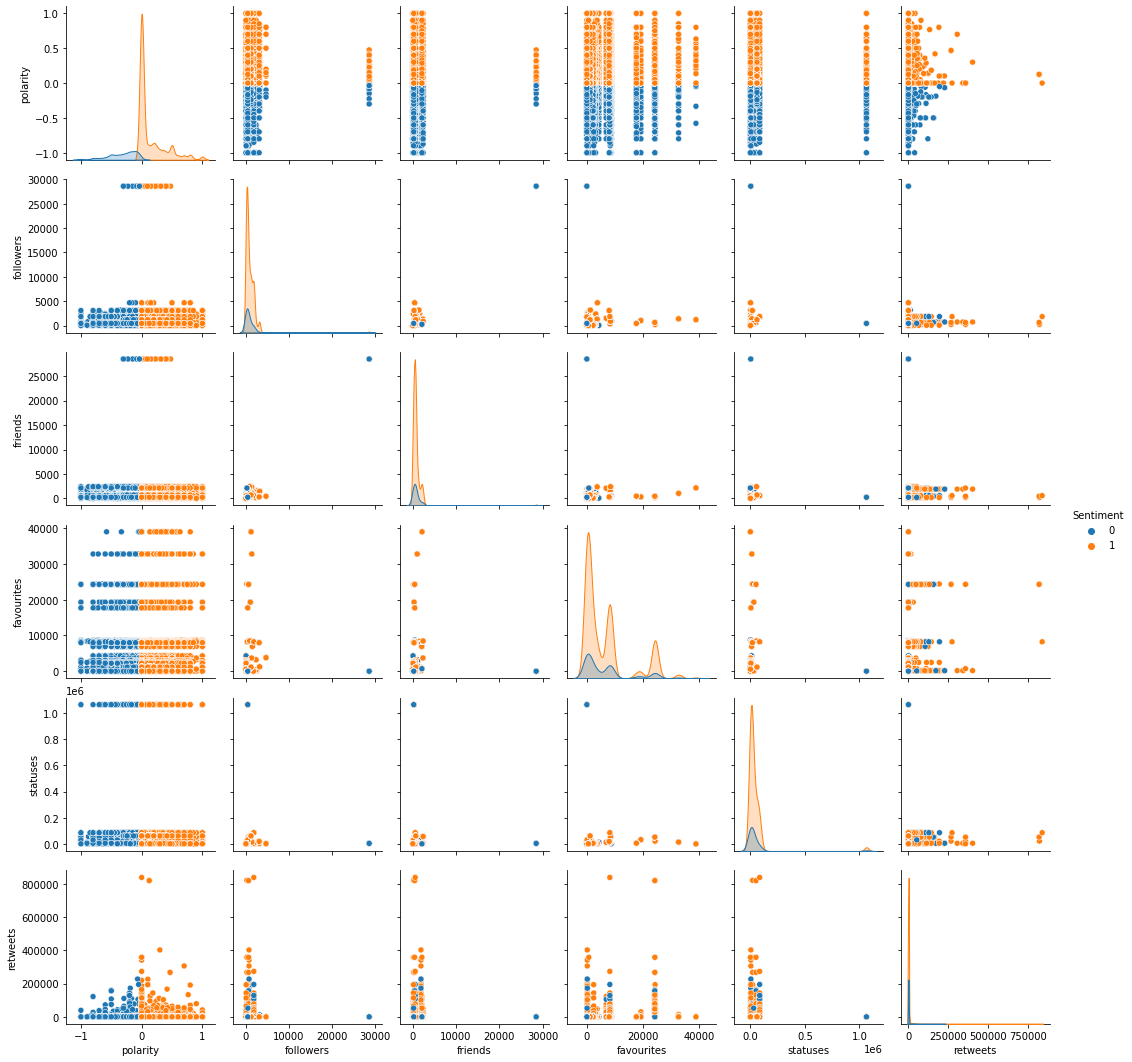

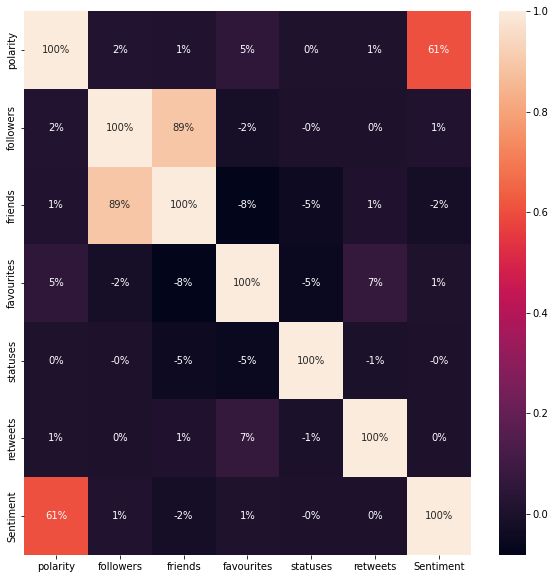

In [38]:
#  plot a pairplot for each pair of variable 
#  plot a pairplot for each pair of variable 
sns.pairplot(df4, hue='Sentiment')

# plot a heatmap to see the correlation between variables
plt.figure(figsize=(10,10))
sns.heatmap(df4.corr(), annot=True, fmt='.0%')


[0.97833041 0.00789523 0.00378848 0.00517619 0.00480969]


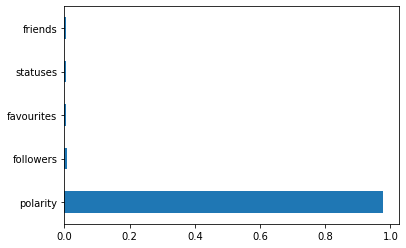

In [23]:
# Find which feature is most important to our classifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
X = df4.iloc[:,0:5]
y = df4.iloc[:,8]


model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Decision Tree, SGD, Logistic Regression

**Decision Tree Classification**

In [25]:
# Import libraries for Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [48]:
#label our variables
X = df4["polarity"] # feature
y = df4["Sentiment"] # target

#Reshape values to fit into classifier
X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

#standardize the data
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)
#This improves the performance for our SGD and Logistic Regression models by roughly ~3%

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split data into train and test

Accuracy: 1.0
F1 Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       718
           1       1.00      1.00      1.00      3282

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


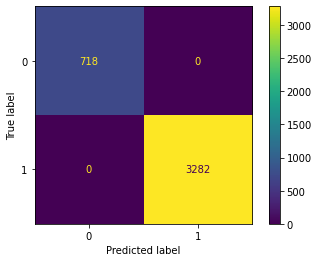

In [49]:
# create a decision tree classifier
clf = DecisionTreeClassifier()

# fit the classifier with the training data
clf.fit(X_train, y_train)

# predict the labels of the test data
y_pred = clf.predict(X_test)

# check the accuracy of the model
print("Accuracy:", accuracy_score(y_test, y_pred))

# check f1, precision, and recall
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("F1 Score:", f1_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))

# check the classification report
print("Classification Report: \n", classification_report(y_test, y_pred))

# Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)

Accuracy: 0.989
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.94      0.97       718
           1       0.99      1.00      0.99      3282

    accuracy                           0.99      4000
   macro avg       0.99      0.97      0.98      4000
weighted avg       0.99      0.99      0.99      4000



/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


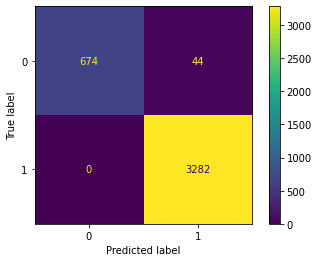

In [50]:
# create a SGD Classifier
sgd = SGDClassifier()

# train the model
sgd.fit(X_train, y_train)

# make predictions
y_pred = sgd.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))
plot_confusion_matrix(sgd, X_test, y_test)

Accuracy: 0.98025
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.89      0.94       718
           1       0.98      1.00      0.99      3282

    accuracy                           0.98      4000
   macro avg       0.99      0.94      0.96      4000
weighted avg       0.98      0.98      0.98      4000



/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


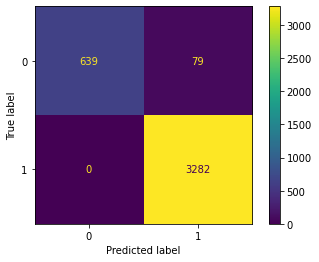

In [51]:
# logistic regression
from sklearn.linear_model import LogisticRegression

# create a logistic regression classifier
logreg = LogisticRegression()

# train the model
logreg.fit(X_train, y_train)

# make predictions
y_pred = logreg.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))
plot_confusion_matrix(logreg, X_test, y_test)